# Programming with Python

Derived from [Novice Python lesson using Python 2.7 - Copyright © Software Carpentry](https://github.com/swcarpentry/python-novice-inflammation-2.7) 

### Programming is hard. Expectations & Takeaways

How many books about riding a bike did you read?

[What Riding A Bike Has To Do With Learning Programming](http://twonontechies.com/bicycles-can-help-you-learn-programming/)

> You can be a scientist in the science of bike ride mechanics and it still won’t help you one bit to do the actual thing.

The best way to learn how to program is to do something useful,
so this introduction to Python is built around a common scientific task:
data analysis.

Our real goal isn't to teach you Python,
but to teach you the basic concepts that all programming depends on.
We use Python in our lessons because:

1.  we have to use *something* for examples;
2.  it's free, well-documented, and runs almost everywhere;
3.  it has a large (and growing) user base among scientists; and
4.  experience shows that it's easier for novices to pick up than most other languages.

But the two most important things are
to use whatever language your colleagues are using,
so that you can share your work with them easily,
and to use that language *well*.

We learned some programming earlier today, using `bash` to work with collections of files and ask some simple questions about files. `bash` is great for generally gluing commands together, but a language like python can offer more specialization when it comes to working with data. With python, you can:

* Write programs that understand and represent numbers, collections, and other complex data types
* Use existing tools (libraries) for fetching, processing, analyzing, and visualizing data
* Automate these operations, share, and publish

The example data for this lesson is going to be some DNA sequence data. We're going to write some programs that 

* understand sequence data
* tell us some basic information about that data (length, count)
* perform operations on that data (reverse complement)
* make plots of our data (GC content)
* work on common file formats (fasta)

To do all that, we'll have to learn a little bit about programming.

# tktktk (update this)

## Prerequisites

Learners need to understand the concepts of files and directories
(including the working directory) and how to start the Jupyter Notebook
interpreter before tackling this lesson. This lesson references the Jupyter (IPython)
Notebook although it can be taught through any Python interpreter.
The commands in this lesson pertain to **Python 2**.

## Getting started

1. Launch **Jupyter Notebook**
2. Wait for a web browser to open
![jupyter home](fig/jupyter-notebook-start.png)

## 01-Warmup: Python & Notebook

These gray boxes are cells. Inside the cells I type code and click the play button to run that code. What's code? Code is telling the computer to do something. Here we're telling the comptuer to add 5 and 3

In [1]:
5 + 3

8

Here we're telling the computer to show (print) a message

In [2]:
print 'Hello, World'

Hello, World


We don't have to print the message directly, we can store it in a variable and then print the variable.

In [3]:
greeting = 'Aloha'
print greeting

Aloha


And we can print multiple things by inserting commas. So let's all greet our neighbor:

In [4]:
neighbor = 'John'
print 'Hello', neighbor

Hello John


Remember, we can work with numbers too

In [5]:
age = 3
print 'My daughter is', age, 'years old.'
age = age + 1
print 'Next year she will be', age

My daughter is 3 years old.
Next year she will be 4


## 02-Expressions, Statements, and Variables (oh my!)

We jumped right in, greeting each other and printing out numbers. We'll get to analyzing DNA sequences in just a minute, but first let's understand the pieces we've been using.

- An expression **represents** something - can be evaluated to a value: 3, 'hello', 5+3
- A statement **does** something, usually with an expression: print 'hello', x = 8
- Variables are **names** we give to expressions (which includes a value). name = 'Dan'

via http://stackoverflow.com/a/4782649 and http://stackoverflow.com/a/4728147 (slightly simplified)

The programs we write will be a series of statements, since they **do** things. Statements are made up of expressions, and we use variables to connect the statements together:

    age = 3
    print 'My daughter is', age, 'years old.'
    age = age + 1
    print 'Next year she will be', age

Now, one feature of the notebook is that we can put an expression in one of these `In [ ]:` cells, run it, and the notebook will tell us what the value is:

In [6]:
56 * 3

168

In [7]:
print 56 * 3

168


### Floats

So far, we've seen two data types used in our expressions: string and integer. There are a few other data types:

For numeric data, there's also `float` - for decimal numbers/fractions and `complex` for complex numbers.

In [8]:
weight_lb = 50.0
weight_kg = weight_lb * 2.2
print weight_kg

110.0


In Python 2, be careful dividing integers. You'll always get an integer back!

In [9]:
9/10

0

### Strings

We've used strings to hold small bits of text - words, sentences, etc. We'll use them all the time in Python, and usually with single quotes.

Strings are one of Python's `sequence` types. The string `'abc'` is a sequence of the characters `a`, `b`, then `c`, in that order.

There is a lot of functionality with any sequence. We can access individual elements by number:

In [10]:
name = 'Daniel'
print name[0]
print name[1]
print name[2]
print name[-1]

D
a
n
l


Note that Python starts counting at 0. We can also **slice** sequences with a colon: 

In [11]:
print name[0:6]
print name[3:6]

Daniel
iel


Or check if a letter exists in a string:


In [12]:
'a' in name

True

Sidenote: **True** is actually a new type of data called a boolean. We'll cover these later, but it's very helpful to do things like check membership or compare two numbers, and boolean values are used for that.

### Assigning Variables

We will be using variables extensively to store data and call it back between different statements. Variables act like a sticky note. You write a name and label a piece of data with it. And anywhere we'd use a value directly (like printing or adding), we can instead use the variable name:


In [13]:
print 3 + 3
sum = 3 + 3
print sum

6
6


The `=` means to assign the expression on the right to the variable on the left. Variable names (like sticky notes) can be reused, and it works like moving the sticky note:

In [14]:
x = 6
x = 4
print x

4


Just as I can put multiple sticky notes on the same object, I can have multiple variables referencing the same piece of data, and later move them around:

In [15]:
x = y = 7

In [16]:
print x, y

7 7


Let's change `x` to a different value, `5`. What happens to `y`

In [17]:
x = 5
print x,y 

5 7


In [18]:
a = 3
b = a + 1
a = 0
print a, b

0 4


`b` doesn't **remember** where it came from. When the statement `b = a + 1` runs, it **evaluates** the expression `a + 1`, gets `4`, and **assigns** that to `b`. This doesn't work like a spreadsheet. In a spreadsheet, computations can reference other cells, and changing one automatically re-computes the others

### Working with a DNA Sequence

Let's start working with genomic data. Here's a DNA sequence we can all copy/paste from the web site. This is a string, and we are going to store it in a variable called `seq10`:

In [19]:
seq10 = 'ACCTGCATGC'

So, we can get the 4th base by indexing into the string at position 3. Remember, Python starts counting at 0!

In [20]:
b4 = seq10[3]
print b4


T


We can combine two strings to make a new string using the plus sign. And the order matters - so we can add to the beginning or the end here:

In [21]:
seq12 = 'CC' + seq10

In [22]:
print seq12

CCACCTGCATGC


In [23]:
seq14 = seq12 + 'TT'

In [24]:
print seq14

CCACCTGCATGCTT


Again, `seq10` is unchanged because we didn't assign anything back to it. When you have a string in Python, there is no way to change it. We'll see some other data types later on that you can change the contents of, or mutate, but with strings, if you want to change them, you need to need to build new strings - even if you put them back in the same variable.

In [25]:
print seq10

ACCTGCATGC


Now, we'd like to perform an operation on the sequence: **reverse complement**. It's a useful process when working with sequences, and it's a great example of a problem you can write down and explain, but may not immediately know how to program.

With any programming endeavor, we'll start by breaking the problem down into parts and then combining them. So to reverse-complemment a sequence, first we'll learn how to reverse it.

### Reversing - loops

Let's quickly take stock of what we know. 

1. Our DNA sequence is represented as a string, and has a variable name
2. Strings are sequences of characters, each character at a numbered position (starting from 0)
3. We can access characters with the `[ ]` square brackets and the position number
4. We can combine characters back into strings with the `+` (plus sign)

So, we can pull out characters in any order we want, and combine them into a new sequence by adding them together:

In [26]:
rev10 = seq10[9] + seq10[8] + seq10[7] + seq10[6] + seq10[5] + seq10[4] + seq10[3] + seq10[2] + seq10[1] + seq10[0]
print rev10

CGTACGTCCA


but that's a bad approach for two reasons:

1.  It doesn't scale:
    if we want to print the characters in a string that's hundreds of letters long,
    we'd be better off just typing them in.

1.  It's fragile:
    if we give it a longer sequence,
    it only reverses part of the data,
    and if we give it a shorter one,
    it produces an error because we're asking for characters that don't exist.

A better way to do this is with a loop. Loops work on sequences like strings, and let you do something with each element, no matter how long the sequence is. Let's start with a basic loop:

In [27]:
for s in seq10:
    print s

A
C
C
T
G
C
A
T
G
C


A few things happened here. 

1. First, we introduced a couple new keywords `for` and `in`. This constructs the loop and says we want to work on each element in `seq20`. This line must end with a **colon**.
2. Second, we created a new variable `s`. This is called a **loop variable** that because it changes at each iteration of the loop.
3. Third, we indented the code that we want to repeat. In some languages you use special words or characters to start or end loops. In Python, the body of the loop is defined by the lines that are indented after the colon.

In [28]:
print 'Before'
for s in seq10:
    print 's is', s
print 'After'


Before
s is A
s is C
s is C
s is T
s is G
s is C
s is A
s is T
s is G
s is C
After


We can do other things in the body - they don't have to relate to the loop variable. For example, if we want to count how long the sequence is, we can use a variable that we add one to every time:

In [29]:
count = 0
for s in seq10:
    count = count + 1
print count

10


Now, I think we're ready to reverse the sequence. Let's make this a hands-on exercise to write some code that reverses the sequence in `seq10` and puts it in a variable called `rev10`. Remember, you can add strings together and the order is important!

In [30]:
rev10 = ''
for s in seq10:
    print s


A
C
C
T
G
C
A
T
G
C


Discussion and other solutions

### Dictionaries - lookups

Now that we've got reverse figured out, we can tackle complementing. To do that, we need to look up the complementary base for base, and build a new sequence:

    A -> T
    C -> G
    G -> C
    T -> A

Python has a data type called a dictionary that's great for looking things up. It works like a dictionary - you have a key (e.g. the word you're looking up) and a value (e.g. the definition). Each key can only be in the dictionary once, but the values may be repeated.

Dictionaries are created with the curly `{}` braces, and accessed with the square `[]` brackets. Let's make a simple dictionary:

In [31]:
fruits = {'apples': 5, 'bananas': 8, 'oranges': 4}
print fruits

{'apples': 5, 'oranges': 4, 'bananas': 8}


Like a string, we access elements in the dictionary with square brackets `[]`. Inside the brackets, we put the **key**, and the elements are the values

In [32]:
print 'I have', fruits['apples'], 'juicy red apples and', fruits['bananas'], 'yummy yellow bananas'

I have 5 juicy red apples and 8 yummy yellow bananas


But unlike a string, dictionaries are **mutable**. This means we can change their contents. Let's correct the number of apples to 3:

In [33]:
fruits['apples'] = 3
print 'I need more apples, I only have', fruits['apples'], 

I need more apples, I only have 3


For this key, we can use a variable. So let's say we can't agree on a favorite fruit but want to use the same code.

In [34]:
favorite = 'bananas'
print 'Time to eat', favorite
fruits[favorite] = fruits[favorite] - 2
print 'Now I have', fruits[favorite], favorite

Time to eat bananas
Now I have 6 bananas


And we can loop over things in a dictionary. It's a lot like looping on a string:

In [35]:
for fruit in fruits:
    print fruit, fruits[fruit]

apples 3
oranges 4
bananas 6


But there are two differences. First, the loop variable is just the key. To get the value we need to use the dictionary and the key. Second, dictionaries are not ordered. Before we get back to our DNA sequence, let's take a minute to total up how many pieces of fruit we have, by looping over the dictionary

In [36]:
count = 0
for fruit in fruits:
    count = count + fruits[fruit]
print count

13


Dictionaries are great because they're flexible, so we can use them to look up anything like complementary bases. So let's start by creating a dictionary with the complements for A and T.

In [37]:
complements = {'A':'T', 'T':'A'}

So if I want to read the complement of `A`, I write `complements['A']`:

In [38]:
print complements['A']

T


We just have A and T here. With dictionaries, we can add more items or even change existing ones:

In [39]:
complements['C'] = 'G'
complements['G'] = 'C'

In [40]:
print complements

{'A': 'T', 'C': 'G', 'T': 'A', 'G': 'C'}


Now, I can complement my sequence from before by looking up the complement inside a loop

In [41]:
comp10 = ''
for s in seq10:
    c = complements[s]
    comp10 = comp10 + c
revcomp10 = ''
for c in comp10:
    revcomp10 = c + revcomp10
print seq10, comp10, revcomp10

ACCTGCATGC TGGACGTACG GCATGCAGGT


As an exercise, let's do this in one single loop instead of two separate ones.

### Lists

We've looked at strings and dictionaries as collection types. There's another one that's really useful, and it's called a list. It's an ordered collection of elements. Lists use the `[]` square brackets, and elments are separated by commas.

Here's one that contains our 3 sequences.:

In [42]:
sequences = [seq10, comp10, revcomp10]
for seq in sequences:
    print seq

ACCTGCATGC
TGGACGTACG
GCATGCAGGT


Lists, unlike strings, are mutable. So I can add or remove to a list, reorder it, or swap items out.

In [43]:
sequences[0] = 'AAAAAGGGGG'

In [44]:
print sequences

['AAAAAGGGGG', 'TGGACGTACG', 'GCATGCAGGT']


Both dictionaries and lists let you delete things with the `del` keyword - again because they're mutable.

In [45]:
del sequences[2]
print sequences

['AAAAAGGGGG', 'TGGACGTACG']


### Tuples

Like a list, but immutable

In [46]:
sequence_types = ('RNA','DNA')
print sequence_types[0]

RNA


In [48]:
sequence_types[1] = 'dna'

TypeError: 'tuple' object does not support item assignment

### Data Types Review

Numeric:
- Integer: 1, 76, 400
- Float: -1.2, 0.5, 3.1415926
- Boolean: True, False

Text:
- Strings: 'ACTGACAG'

Collections:
- Dictionaries: {'apples': 3, 'bananas': 4} **mutable**
- Lists: [1, 3, 5, 7] **mutable**
- Tuples: ('RNA','DNA')

Text and collections can be used in loops!

### Making choices / Conditionals

We can ask Python to take different actions, depending on a condition, with an if statement:

In [49]:
if 'GC' in seq10:
    print 'Found a GC'
else:
    print 'Did not find a GC'
print 'done'

Found a GC
done


The second line of this code uses the keyword `if` to tell Python that we want to make a choice.
If the test that follows the `if` statement is true,
the body of the `if`
(i.e., the lines indented underneath it) are executed.
If the test is false,
the body of the `else` is executed instead.
Only one or the other is ever executed

Conditional statements don't have to include an `else`.
If there isn't one, Python simply does nothing if the test is false:

We can have multiple conditions we check too, and to demonstrate that, I want to calculate the **GC-content percentage** of the sequence.

(G + C) / (A + T + G + C)
        

So to approach this, we're going to loop over the sequence and total up the G's and C's. We also need to total up The A's and T's

The general algorithm here will be

- Loop over each item in the sequence
    - If it's a `G` or a `C`, increment our GC counter
    - For all items, increment our ATGC counter
    
We know how to write a loop, and we know how to write a counter and incrment it. And we just saw `if`, but we haven't used it in our loop, so let's write that

In [50]:
count_GC = 0
count_ATGC = 0
for s in seq10:
    if s == 'G':
        count_GC = count_GC + 1
    if s == 'C':
        count_GC = count_GC + 1
    count_ATGC = count_ATGC + 1
percent_GC = (count_GC * 100) / count_ATGC
print 'GC-content percentage:', percent_GC, '%'

GC-content percentage: 60 %


Now that works, but we've got some repetition there. In both cases (`G` and `C`), we're running the same code. One of Python's philosophies is _Don't Repeat Yourself_, and it's generally a good idea.

So, when we want to check if one condition is true **or** another, we the keyword **or** in between the two tests.

In [51]:
count_GC = 0
count_ATGC = 0
for s in seq10:
    if s == 'G' or s == 'C':
        count_GC = count_GC + 1
    count_ATGC = count_ATGC + 1
percent_GC = (count_GC * 100) / count_ATGC
print 'GC-content percentage:', percent_GC, '%'

GC-content percentage: 60 %


Now, another common case for conditionals is testing if numbers are above or below certain thresholds. Let's say we want to identify GC content percentages of greater than 60 as **high** and below 30 as **low**. These conditions are exclusive - meaning only one can be true, so we can write our if statement like this:

In [52]:
if percent_GC > 60:
    print 'High GC-content'
elif percent_GC < 30:
    print 'Low GC-content'
else:
    print 'Normal GC-content'

Normal GC-content


## Break here

### Functions

We've said that these sequence types have a lot of common functionality - We can access individual elements, slice them, or loop over them. But there's a lot more things we can do with **functions**. There's about 75 functions that are built-in and just ready to use. They can do things like tell you the size of a collection, convert between data types, reverse collections, and open files.

You can spot them by a name followed by parenthesis. Here's one now:

We can use the `len` function to get the size of any collection:

In [53]:
print len(seq10), len(complements), len(sequence_types)

10 4 2


We can get the absolute value of a number:

In [54]:
print abs(2j)

2.0


Or get the largest item of a list

In [55]:
x = [7,3,2,8,4]
max(x)

8

Or convert a string to a number

In [56]:
print float('3.14')

3.14


Functions open up a huge number of possibilities, but also can be overwhelming. It's a good opportunity to mention the online help, both inside the notebook or outside.

https://docs.python.org/2/library/functions.html

Many data types have their own specialty functions too. Strings are very common to get as input data, but we often need to convert them to something else like a list. There's a `split` function that does just this.

In [57]:
fruits = 'apples oranges bananas'
print str.split(fruits)

['apples', 'oranges', 'bananas']


It's **part of** the string data type, so when we want to use the function, we start with `str`. I mentoned there were 75 built-in functions, but there are thousands more that are **part of** various data types and libraries. Anytime we see the dot in python, that means we're getting more specific.

The `split` function, since it's part of `str` (a type), is called a method. The most common way to use it like this:

In [58]:
fruit_list = fruits.split()
print fruit_list

['apples', 'oranges', 'bananas']


In [59]:
fruit_list.sort()
print fruit_list

['apples', 'bananas', 'oranges']


In [60]:
sorted_fruits = str.join(' ', fruit_list)
print sorted_fruits

apples bananas oranges


## I don't like this example

Exercise: Count up the decimal numbers in the string `'1 1 2 3 5 8 13'`

In [61]:
numbers = '1 1 2 3 5 8 13'
total = 0
for n in numbers.split():
    total = total + int(n)
print total

33


At this point, we've written some code that performs basic operations on genomic sequences: reverse complement and calculating GC content percentage. And it's only running on our example sequences now, so it would be great to run it on any sequence or from a different part of the program.

Now we could copy and paste the sections of code around, but that's going to get very repetitive and fragile. So instead, we can put these bits of code into our own functions, and then have a shorthand way to run these pieces of code.

We'll get to a reverse-complement function in a moment, but first let's introduce a very basic function, double. This is going to take any input value, multiply it by 2, and provide the result

In [62]:
def double(x):
    return 2 * x

So this is very similar to writing a loop or an if statement. We take the code that does the computation, and indent it under a `def`, which **defines** a function

Function definitions have 3 parts: 

- The name: `double`
- The arguments enclosed in parenthesis: `x`
- The indented body, which does the work and may `return` something

Calling your own functions is the same as calling the built-in ones - just use the name

In [63]:
doubled = double(100)
print doubled


200


In [64]:
print double('ACCC')

ACCCACCC


### Arguments and return values

Within our function we use this variable `x`, which we didn't assign traditionally. It's a function argument, meaning that it will be set with whatever we put inside the parenthesis. This is actually a great feature, and it's the reason we can reuse functions. Every time we call the `double` function, that function gets its own private `x` to use. Other functions can't interfere with it, and it can't escape it's own function body and change a variable you might have called `x`.

We also have this new keyword, `return`. Most functions will use this, where you want to do some work or computation and return a result. In this example, you'd expect a function with an action name like `double` would do some work and provide you the result.

In [65]:
def double(x):
    return 2*x
doubled = double(6)
print doubled
print x

12
[7, 3, 2, 8, 4]


Exercise: Write a function called `multiply` that multiplies two numbers `x` and `y`, and prints out the result before returning it

## Reverse-complementing

Let's start with reversing. This is a great example because we have two operations that we want to name and reuse, and may even want to use thim independently. So we'll write them independently and then compose them together.

To write a function that reverses a sequence, we want to take an input value, the sequence, reverse it, and return that.

In [66]:
def reverse(seq):
    reversed_seq = ''
    for s in seq:
        reversed_seq = s + reversed_seq
    return reversed_seq


In [67]:
print reverse('ACTG')

GTCA


In [68]:
print seq10, reverse(seq10)

ACCTGCATGC CGTACGTCCA


To test that the function works, we could eyeball it, and we can also test that double-reversing gives us the original sequence:

In [69]:
reverse(reverse(seq10))

'ACCTGCATGC'

Exercise: Write an `if` statement that checks if a sequence and the double-reversed sequence are identical. This may sound trivial, but it's actually one of the most informative ways to explore code and see how it works

In [70]:
if reverse(reverse(seq10)) == seq10:
    print 'I-dentical!'
else:
    print 'Not great, bob!'
        

I-dentical!


Now we can move onto complementing. So let's pull up that code and move it into a function. We're going to copy and paste, but for the last time. Let's also tidy up our variable names

In [71]:
def complement(seq):
    complemented_seq = ''
    for s in seq:
        c = complements[s]
        complemented_seq = complemented_seq + c
    return complemented_seq

In [72]:
print complement(complement('ACCA'))

ACCA


That works, but there's still one piece that's odd. When we write a function, we should be able to understand what it does at a glance, without looking in a million places. And it should behave the same way every time if we give it the same input. Does anyone see anything here that could break easily?

The function uses a variable called `complements`, but it doesn't create it or check it. So if we try this without setting up complements, the function will fail. And if we have complements set to something we don't expect, we could get very wrong data:


In [73]:
complements = {'A':'A','C':'C','G':'G','T':'T'}

In [74]:
complement('AC')

'AC'

When we have a top-level variable here, we call that a **global** variable. And some things do need to be global, but using global variables inside of functions is a bad practice - because you don't know what they're going to be. Instead, we can create a local variable inside the function that has the data we need:

In [75]:
def complement(seq):
    complements = {'A': 'T', 'C': 'G', 'T': 'A', 'G': 'C'}
    complemented_seq = ''
    for s in seq:
        c = complements[s]
        complemented_seq = complemented_seq + c
    return complemented_seq

In [76]:
complement('ACC')

'TGG'

In [77]:
complements = 42
complement('ACC')

'TGG'

Now we've got solid functions for reverse and complement. We've tested them independently, so now let's put them together in another function

In [78]:
def reverse_complement(seq):
    return reverse(complement(seq))


In [79]:
reverse_complement('CCAA')

'TTGG'

Exercise: I found out that you can reverse a string (or a list) by using the slice notation `[::-1]`. Update the reverse function to use this and see if anything changes with `reverse_complement`

### Working with Files

When working with real-world data, it will typically be in a file, and **not** in your code. Fortunately, Python has built-in functions to do this if you have simple text based data, and there are many libraries available for working with any kind of file you might have - images, video, numeric data, etc.

Since we're working with text-based sequence data, we're going to focus on reading data from FASTA files. It's pretty easy to understand and will demonstrate how to approach these types of problems

## Open and close

When you use a word processor or spreadsheet, you open files, work with them, and then close them when you're done. In python, you do the same thing. Let's look at the help and see what open does.

In [80]:
f = open('test.fa')
for line in f:
    print line
f.close()

>lcl|AE014075.1_gene_2 [locus_tag=c0002] [location=534..911]

GTGTTCTACAGAGAGAAGCGTAGAGCAATAGGCTGTATTTTGAGAAAGCTGTGTGAGTGGAAAAGTGTAC

GGATTCTGGAAGCTGAATGCTGTGCAGATCATATCCATATGCTTGTGGAGATCCCGCCCAAAATGAGCGT

ATCAGGCTTTATGGGATATCTGAAAGGGAAAAGCAGTCTGATGCCTTACGAGCAGTTTGGTGATTTGAAA

TTCAAATACAGGAACAGGGAGTTCTGGTGCAGAGGGTATTACGTCGATACGGTGGGTAAGAACACGGCGA





### Reading lines

Most of the time with a text file, you'll read it in line-by-line, and python makes that easy. Since we're reading a text file, we get each line as a string inside the loop.

Now, we have a blank space in between each line of text. That's because each line we read includes the `\n` (newline) character. Python includes this because it was in the original file, but we can easily strip that off with `.strip()`:



In [81]:
f = open('test.fa')
for line in f:
    line = line.strip()
f.close()

Exercise: Write a function **read_fasta** that 

1. Takes a file name as an argument 
2. Reads the file
3. Returns one long string of sequence data from the file (stripping newlines)
4. Skips lines that contain the `>` character. Hint: `pass` can be used to do nothing


In [82]:
def read_fasta(filename):
    sequence = ''
    f = open(filename)
    for line in f:
        line = line.strip()
        if '>' in line:
            pass
        else:
            # Append to the last sequence
            sequence = sequence + line
    f.close()
    return sequence


In [83]:
print read_fasta('test.fa')

GTGTTCTACAGAGAGAAGCGTAGAGCAATAGGCTGTATTTTGAGAAAGCTGTGTGAGTGGAAAAGTGTACGGATTCTGGAAGCTGAATGCTGTGCAGATCATATCCATATGCTTGTGGAGATCCCGCCCAAAATGAGCGTATCAGGCTTTATGGGATATCTGAAAGGGAAAAGCAGTCTGATGCCTTACGAGCAGTTTGGTGATTTGAAATTCAAATACAGGAACAGGGAGTTCTGGTGCAGAGGGTATTACGTCGATACGGTGGGTAAGAACACGGCGA


In [84]:
reverse_complement(read_fasta('test.fa'))

'TCGCCGTGTTCTTACCCACCGTATCGACGTAATACCCTCTGCACCAGAACTCCCTGTTCCTGTATTTGAATTTCAAATCACCAAACTGCTCGTAAGGCATCAGACTGCTTTTCCCTTTCAGATATCCCATAAAGCCTGATACGCTCATTTTGGGCGGGATCTCCACAAGCATATGGATATGATCTGCACAGCATTCAGCTTCCAGAATCCGTACACTTTTCCACTCACACAGCTTTCTCAAAATACAGCCTATTGCTCTACGCTTCTCTCTGTAGAACAC'

## Scripts

We've done a good job of organizing our code into functions here, but we've only been running them from this notebook. So next, we're going to take our code and put it in a script - starting with the `read_sequence` function.


This is going to be very familiar, since we're doing the same thing we did in bash, just with a different language!

`$ nano read_fasta.py`

In [85]:
%%writefile read_fasta.py
def read_fasta(filename):
    sequence = ''
    f = open(filename)
    for line in f:
        line = line.strip()
        if '>' in line:
            pass
        else:
            # Append to the last sequence
            sequence = sequence + line
    f.close()
    return sequence

print read_fasta('test.fa')


Overwriting read_fasta.py


`$ python read_fasta.py`

Our script reads our `test.fa` file every time we run it, but we know most programs don't work that way. The programs we used in bash expected a data file as an *argument*, and that's a good convention for programs we write too.

In Python, our program can get these arguments, but we have to load a library to access them. Google it!

`import sys`

https://docs.python.org/2/library/sys.html

Libraries are incredibly useful - there are libraries for working with numeric and scientific data, generating plots, fetching data from the web, working with image and document files, databases, etc. And of course, there's a library for getting things like your script's command-line arguments.

So, let's change our `read_fasta.py` program slightly

In [86]:
%%writefile read_fasta.py
import sys

def read_fasta(filename):
    sequence = ''
    f = open(filename)
    for line in f:
        line = line.strip()
        if '>' in line:
            pass
        else:
            # Append to the last sequence
            sequence = sequence + line
    f.close()
    return sequence

print read_fasta(sys.argv[1])


Overwriting read_fasta.py


## Putting it all together

Advanced functions and plotting

In [87]:
def read_fasta_dict(filename):
    """
    Reads sequences from a fasta file, and returns a dictionary that maps the 
    sequence description (key) to the sequence (value) 
    
    For example:
    
    >seq1
    AACCGG
    >seq2
    CCTTTG
    
    would result in {'seq1':'AACCGG','seq2':'CCTTG'}
    
    """
    sequences = {}
    f = open(filename)
    for line in f:
        line = line.strip()
        if '>' in line:
            sequence_name = line # Need to keep track of the name since "line" will change next time
            sequences[sequence_name] = ''
        else:
            # Append to the last sequence
            sequences[sequence_name] = sequences[sequence_name] + line
    f.close()
    return sequences


Below is an improved version of `gc_content_percentage` that uses string functions `count` and `len` to simplify the counting

In [88]:
def gc_content_percent(sequence):
    """
    Calculates the GC-content percentage of the input sequence
    Returns the percentage as an integer out of 100
    """
    gc = sequence.count('G') + sequence.count('C')
    atcg = len(sequence)
    percent_gc = (gc * 100) / atcg
    return percent_gc


In [89]:
print gc_content_percent('GAAC')

50


In [90]:
read_fasta_dict('test.fa')

{'>lcl|AE014075.1_gene_2 [locus_tag=c0002] [location=534..911]': 'GTGTTCTACAGAGAGAAGCGTAGAGCAATAGGCTGTATTTTGAGAAAGCTGTGTGAGTGGAAAAGTGTACGGATTCTGGAAGCTGAATGCTGTGCAGATCATATCCATATGCTTGTGGAGATCCCGCCCAAAATGAGCGTATCAGGCTTTATGGGATATCTGAAAGGGAAAAGCAGTCTGATGCCTTACGAGCAGTTTGGTGATTTGAAATTCAAATACAGGAACAGGGAGTTCTGGTGCAGAGGGTATTACGTCGATACGGTGGGTAAGAACACGGCGA'}

In [91]:
orchids = read_fasta_dict('ls_orchid.fasta')

In [92]:
lengths, gc_contents = list(), list()
for k,v in orchids.items():
    lengths.append(len(v))
    gc_contents.append(gc_content_percent(v))


## Plotting

The most popular library for plotting in Python is `matplotlib`, and it's integrated into the notebook here, so you can see your plots inline

In [93]:
import matplotlib
import matplotlib.pyplot as plt

In [94]:
%matplotlib inline

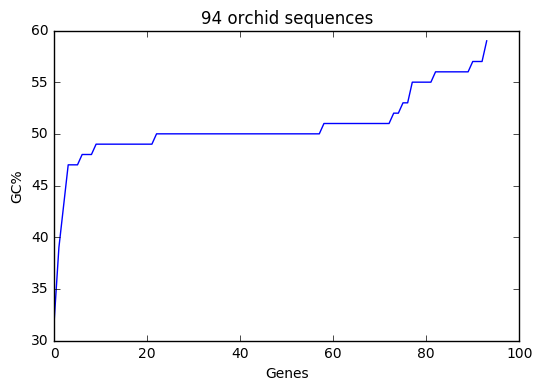

In [95]:
plt.plot(sorted(gc_contents))
plt.xlabel('Genes')
plt.ylabel('GC%')
plt.title(str(len(gc_contents)) + ' orchid sequences')

In [96]:
%matplotlib inline

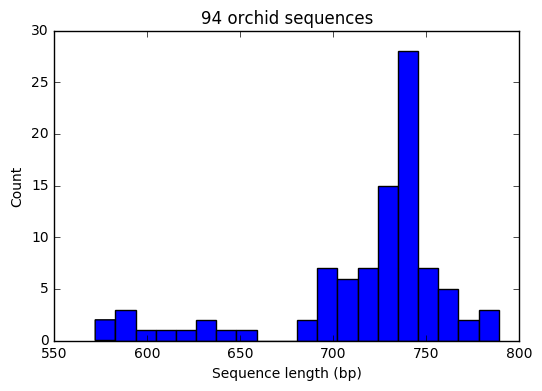

In [97]:
plt.hist(lengths, bins=20)
plt.xlabel('Sequence length (bp)')
plt.ylabel('Count')
plt.title(str(len(gc_contents)) + ' orchid sequences')